In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('fire_archive.csv')
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [3]:
df.shape

(36011, 15)

In [4]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [5]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [6]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


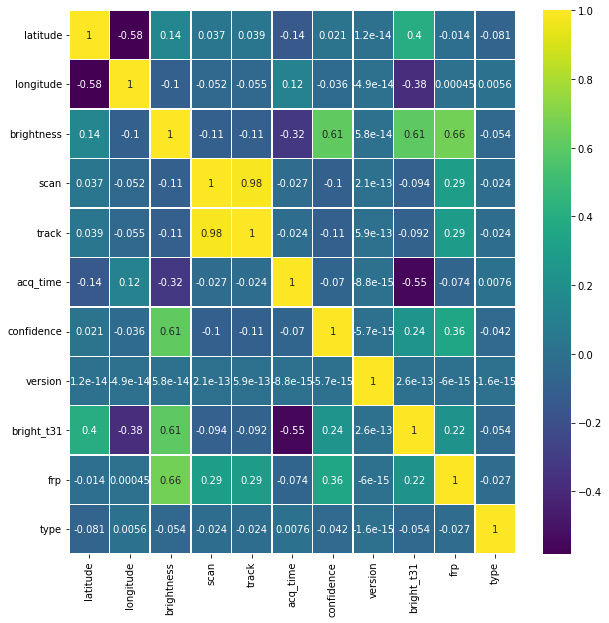

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [8]:
df= df.drop(['track'], axis = 1)

In [9]:
# Finding categorical data
print("The scan column")
print(df['scan'].value_counts())
print()
print("The aqc_time column")
print(df['acq_time'].value_counts())
print()
print("The satellite column")
print(df['satellite'].value_counts())
print()
print("The instrument column")
print(df['instrument'].value_counts())
print()
print("The version column")
print(df['version'].value_counts())
print()
print("The daynight column")
print(df['daynight'].value_counts())
print()

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
1558      1
635       1
1153      1
302       1
1519      1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



In [10]:
df= df.drop(['instrument', 'version'], axis = 1)

df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [11]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}
df['daynight'] = df['daynight'].map(daynight_map)
df['satellite'] = df['satellite'].map(satellite_map)

df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [12]:
df['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [13]:
types = pd.get_dummies(df['type'])
df = pd.concat([df, types], axis=1)

df = df.drop(['type'], axis = 1)
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [14]:
# Renaming columns for better understanding

df = df.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [15]:
# Now I mentioned we will be converting scan column to categorical type, we will be doing this using binning method.
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
df['scan_binned'] = pd.cut(df['scan'], bins=bins, labels=labels)

df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4


In [16]:
# Converting the datatype to datetype from string or numpy.

df['acq_date'] = pd.to_datetime(df['acq_date'])
df.head(3)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4


In [17]:
# Now we will be dropping scan column and handle date type data - we can extract useful information from these datatypes 
# just like we do with categorical data.

df = df.drop(['scan'], axis = 1)

In [18]:
df['year'] = df['acq_date'].dt.year

df.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019


In [19]:
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

In [20]:
df.shape

(36011, 17)

In [21]:
# Separating our target varibale:

y = df['confidence']
fin = df.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

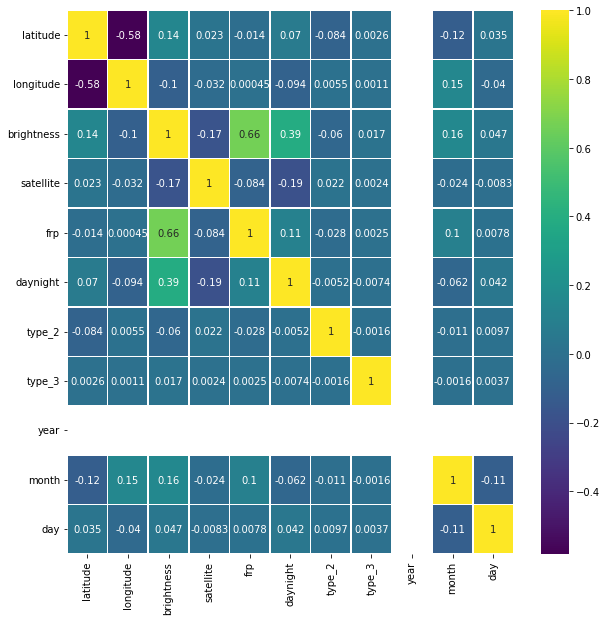

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [23]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,0,0,4,2019,8,1


Splitting the clean data into training and testing dataset

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

Using RandomForestRegressor for model building

In [25]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [26]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.33 %


In [27]:
#Checking the accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

64.88 %


In [32]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))

Model Tuning

In [29]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation
rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=  30.1s
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.1s remaining:    0.0s


[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=  28.3s
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 
[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=  28.3s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=  35.9s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=  35.8s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=  36.0s
[CV] n_estimators=478, min_samples_split=3, min_samp

In [ ]:
rf_random.best_params_

In [ ]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [ ]:
#Fit
random_new.fit(Xtrain, ytrain)

y_pred1 = random_new.predict(Xtest)

#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

In [ ]:
#Checking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

In [ ]:
# Save the trained model as a pickle string.
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))

In [ ]:
# # Load the pickled model - 
reg_from_pickle = pickle.load(saved_model)
# # Use the loaded pickled model to make predictions
# # reg_from_pickle.predict(X_test)

bz2file

In [ ]:
!pip install bz2file

In [ ]:
import bz2

compressionLevel = 9
source_file = 'ForestModel.pickle' # this file can be in a different format, like .csv or others...
destination_file = 'ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()